In [1]:
import argparse as ap
import cv2
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing
import math
import random

In [38]:
des_list, image_paths = joblib.load('pkl/des_list_{}.pkl'.format('rumor'))

In [39]:
len(image_paths)

10664

In [40]:
len(des_list)

10555

In [41]:
for image_path, descriptor in des_list:
    if descriptor is None:
        des_list.remove((image_path, descriptor))

des_sum = 0
for image_path, descriptor in des_list:
    des_sum += descriptor.shape[0]

In [42]:
des_sum

9216844

In [43]:
len(des_list)

10547

In [44]:
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))

KeyboardInterrupt: 

In [8]:
descriptors.shape

(497966, 128)

## 测试 cosine 的 np 实现

In [1]:
def cosine_similarity(vec_a, vec_b):
    len_a = 0
    for x in vec_a:
        len_a += x ** 2
    len_a = np.sqrt(len_a)

    len_b = 0
    for x in vec_b:
        len_b += x ** 2
    len_b = np.sqrt(len_b)

    multi = 0
    for i in range(len(vec_a)):
        multi += vec_a[i] * vec_b[i]

    return float(multi / (len_a * len_b))


def cosine_similarity_np(vec_a, vec_b):
    return vec_a.dot(vec_b) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b))

In [3]:
im_features, image_paths, idf, num_words, voc = joblib.load('pkl/rumor_im_features.pkl')

In [4]:
cosine_similarity(im_features[0], im_features[4199])

0.4384922161790193

In [5]:
cosine_similarity_np(im_features[0], im_features[4199])

/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/numpy/linalg/linalg.py:2168: RuntimeWarning: invalid value encountered in sqrt
  ret = sqrt(sqnorm)


nan

In [6]:
im_features[0].dot(im_features[4199])

0.0

In [82]:
im_features[0].shape

(1000,)

In [7]:
from sklearn.metrics import pairwise_distances

In [9]:
cos = pairwise_distances(im_features, metric="cosine")

In [12]:
cos.shape

(10547, 10547)

## 测试Rumor_All 的聚类效果

In [2]:
single_pass_cluster = joblib.load('pkl/rumor_spc_all.pkl')
im_features, image_paths, idf, num_words, voc = joblib.load('pkl/rumor_all_im_features.pkl')

In [3]:
print(len(image_paths))
len(single_pass_cluster.cluster_list)

26295


21970

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cluster_list = single_pass_cluster.cluster_list
cluster_len_list = [len(x.node_list) for x in cluster_list]

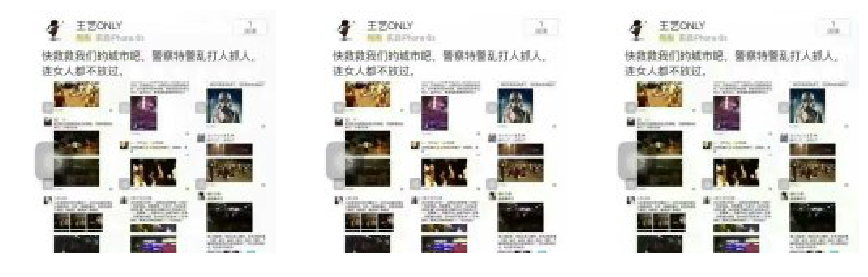

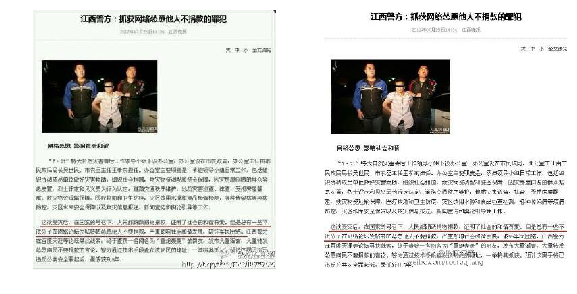

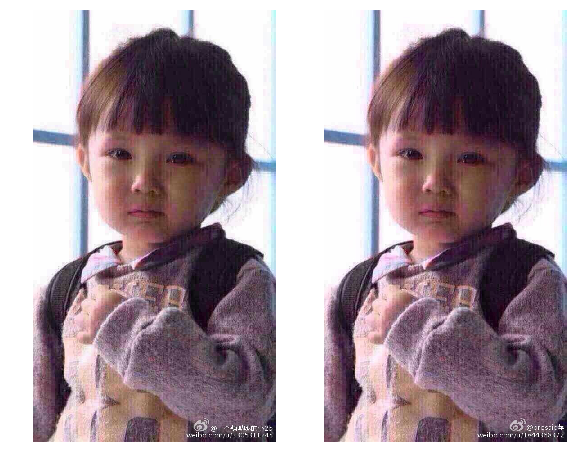

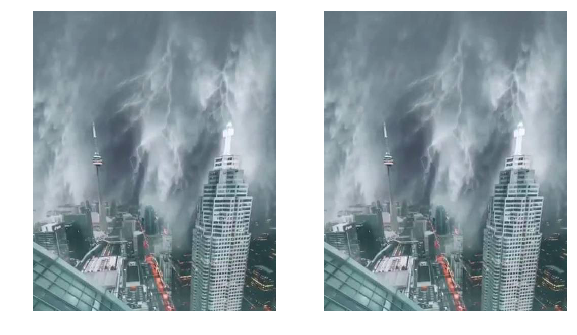

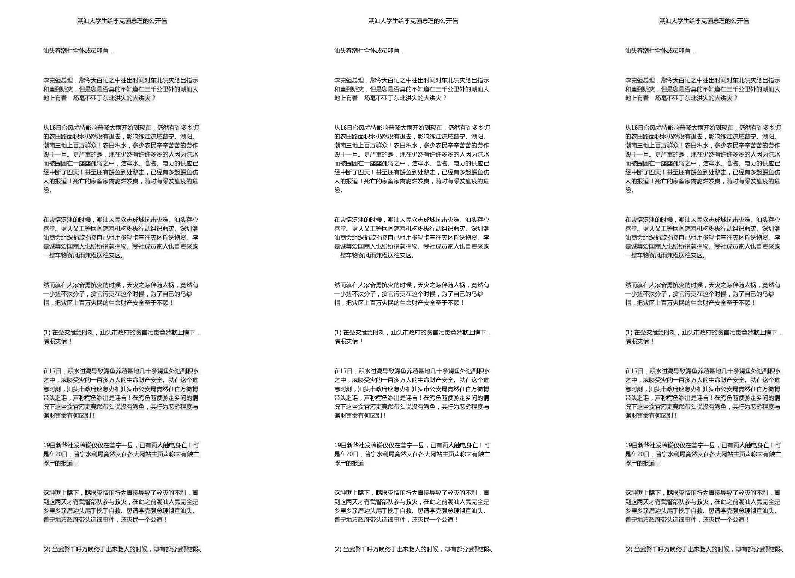

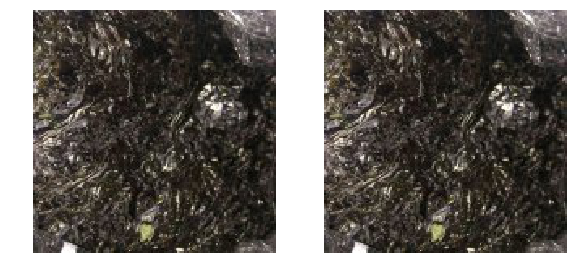

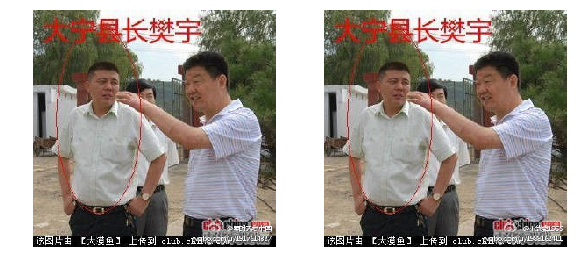

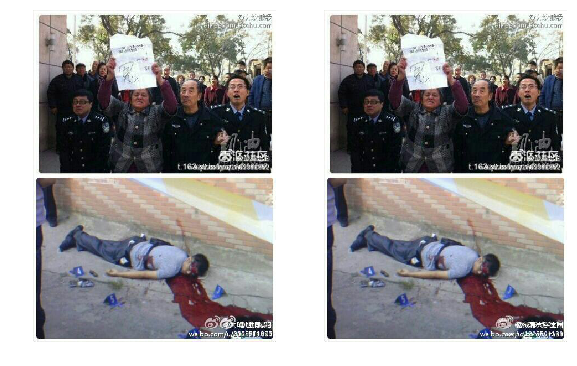

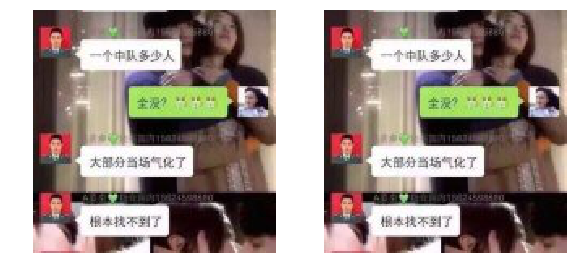

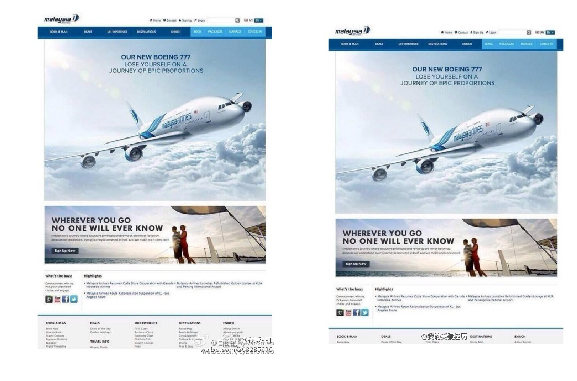

In [42]:
for i in range(10):
    for cluster in cluster_list[random.randint(0, len(cluster_list)-1):]:
        n_list = cluster.node_list
    #     print('{} : {}'.format(len(n_list), n_list))

        if len(n_list) == 1:
            continue

        plt.figure(figsize=(20,10))
        for i, n in enumerate(n_list[:4]):
            name = image_paths[n]

            plt.subplot(1, 4, i+1)
            plt.imshow(plt.imread(name))
            plt.axis('off')

        break

## 定位

In [19]:
print(len(image_paths))
len(im_features)

26295


26295

In [33]:
def get_a_b(img_1, img_2):
    for path in image_paths:
        if img_1 in path:
            a = image_paths.index(path)
        if img_2 in path:
            b = image_paths.index(path)
    return a, b

In [34]:
import SinglePass

In [35]:
def show(a, b):
    plt.subplot(1,2,1)
    plt.imshow(plt.imread(image_paths[a]))
    plt.subplot(1,2,2)
    plt.imshow(plt.imread(image_paths[b]))

    cos = SinglePass.cosine_similarity(im_features[a], im_features[b])
    print(cos)

0.740578
0.767047
0.727314
0.730947
0.753729
0.690576
0.68667
0.70446
0.731176
0.683846


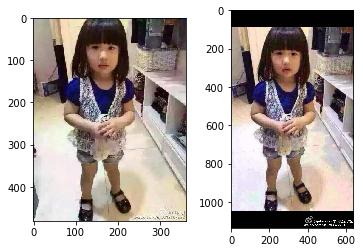

In [39]:
x = ['4a423125jw1eraqykoksaj20f00qo0ur.jpg', '4aa3ad25jw1era4ok234dj20f20qoab6.jpg', 
     '3bfe8271jw1era46fn9tmj20k00zkjwm', '3e28be33jw1erbbs2eb07j20hs0nq0ua', '4c7eb503jw1era4mex2ajj20hq0vkmzl']

for i in range(len(x)):
    for j in range(i+1, len(x)):
        a, b = get_a_b(x[i], x[j])
        show(a, b)